# Data Preparation

In [3]:
import pandas as pd
import numpy as np

In [4]:
PlayerInf = pd.read_csv("../data/player_info.csv")
#Games_plays = pd.read_csv("../data/game_plays.csv")

#Game_goalie_stats = pd.read_csv("../data/game_plays_players.csv")
Game_skater_stats = pd.read_csv("../data/game_skater_stats.csv")
Game = pd.read_csv("../data/game.csv")

### Players Statistics (detailed)

In [5]:
Player_stat_detailed = pd.merge(Game_skater_stats, Game, on='game_id')

In [6]:
Player_stat_detailed.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')

In [7]:
Player_stat_detailed = Player_stat_detailed.drop(['game_id', 'team_id', 'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz' ], axis=1)

In [8]:
Player_stat_detailed['count'] = 1

In [9]:
Player_stat_detailed.columns

Index(['player_id', 'timeOnIce', 'assists', 'goals', 'shots', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins',
       'faceoffTaken', 'takeaways', 'giveaways', 'shortHandedGoals',
       'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'season', 'count'],
      dtype='object')

In [10]:
grouped = Player_stat_detailed.groupby('player_id', as_index = False)

In [11]:
Player_stat_detailed = grouped.agg({'timeOnIce' : 'mean',
                                     'assists' : 'mean',
                                     'goals' : 'mean',
                                     'shots' : 'mean',
                                     'hits' : 'mean',
                                     'powerPlayGoals' : 'mean',
                                     'powerPlayAssists' : 'mean',
                                     'penaltyMinutes' : 'mean',
                                     'faceOffWins' : 'mean',
                                     'faceoffTaken' : 'mean',
                                     'takeaways' : 'mean',
                                     'giveaways' : 'mean',
                                     'shortHandedGoals' : 'mean',
                                     'shortHandedAssists' : 'mean',
                                     'blocked' : 'mean',
                                     'plusMinus' : 'sum',
                                     'evenTimeOnIce' : 'mean',
                                     'shortHandedTimeOnIce' : 'mean',
                                     'powerPlayTimeOnIce' : 'mean',
                                     'count' : 'sum'}, group_keys = True)

In [12]:
Player_stat_detailed = pd.merge(Player_stat_detailed, PlayerInf, on='player_id')
Player_stat_detailed.columns

Index(['player_id', 'timeOnIce', 'assists', 'goals', 'shots', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins',
       'faceoffTaken', 'takeaways', 'giveaways', 'shortHandedGoals',
       'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'count', 'firstName',
       'lastName', 'nationality', 'birthCity', 'primaryPosition', 'birthDate',
       'link'],
      dtype='object')

/Users/kirillbykov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


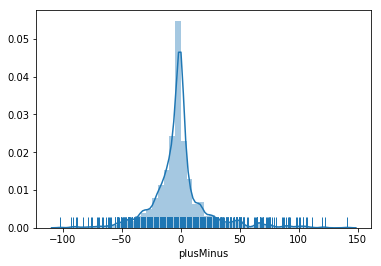

In [13]:
import seaborn as sns
%matplotlib inline

sns.distplot(Player_stat_detailed['plusMinus'], rug=True)

In [14]:
Player_stat_detailed[['goals','firstName',
       'lastName', 'nationality', 'birthCity', 'primaryPosition', 'birthDate',
       'link']].sort_values(by=['goals'])

,goals,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
790,0.000000,Joonas,Nattinen,FIN,Jamsa,C,1991-01-03,/api/v1/people/8475198
935,0.000000,Julian,Melchiori,CAN,Richmond Hill,D,1991-12-06,/api/v1/people/8475815
928,0.000000,Jarred,Tinordi,USA,Burnsville,D,1992-02-20,/api/v1/people/8475797
917,0.000000,Morgan,Ellis,CAN,Summerside,D,1992-04-30,/api/v1/people/8475782
914,0.000000,Petter,Granberg,SWE,Gallivare,D,1992-08-27,/api/v1/people/8475774
899,0.000000,Brett,Bulmer,CAN,Prince George,RW,1992-04-26,/api/v1/people/8475757
898,0.000000,John,McFarland,CAN,Richmond Hill,LW,1992-04-02,/api/v1/people/8475756
884,0.000000,Curtis,Hamilton,USA,Tacoma,LW,1991-12-04,/api/v1/people/8475734
882,0.000000,Danny,Biega,CAN,Montreal,D,1991-09-29,/api/v1/people/8475732
880,0.000000,Mark,Alt,USA,Kansas City,D,1991-10-18,/api/v1/people/8475729


## Players Goals

In [23]:
Games_plays = pd.read_csv("../data/game_plays.csv")
Game_plays_players = pd.read_csv("../data/game_plays_players.csv")


Goals = pd.merge(Games_plays[Games_plays['event'] == "Goal"],Game_plays_players[Game_plays_players['playerType'] == "Scorer"][['play_id','player_id']],on = 'play_id')

In [28]:
total_goals = pd.DataFrame(Goals.groupby(['player_id']).size())
total_goals

,0
player_id,
8448208,101
8455710,1
8457981,26
8458529,2
8458537,20
8458590,4
8458951,6
8459442,22
8459444,10


In [25]:
Goals = pd.merge(Goals, PlayerInf[['player_id', 'firstName', 'lastName', 'primaryPosition', 'birthDate']], on = 'player_id')

In [31]:
total_goals =  pd.merge(total_goals, PlayerInf[['player_id', 'firstName', 'lastName', 'primaryPosition', 'birthDate']], on = 'player_id')
total_goals.sort_values(by=[0])

,player_id,0,firstName_x,lastName_x,primaryPosition_x,birthDate_x,firstName_y,lastName_y,primaryPosition_y,birthDate_y,firstName,lastName,primaryPosition,birthDate
699,8475263,1,Wade,Megan,C,1990-07-22,Wade,Megan,C,1990-07-22,Wade,Megan,C,1990-07-22
623,8474793,1,Justin,Hodgman,C,1988-06-27,Justin,Hodgman,C,1988-06-27,Justin,Hodgman,C,1988-06-27
616,8474722,1,Luke,Witkowski,RW,1990-04-14,Luke,Witkowski,RW,1990-04-14,Luke,Witkowski,RW,1990-04-14
615,8474719,1,Teemu,Hartikainen,C,1990-05-03,Teemu,Hartikainen,C,1990-05-03,Teemu,Hartikainen,C,1990-05-03
119,8468501,1,Anton,Volchenkov,D,1982-02-25,Anton,Volchenkov,D,1982-02-25,Anton,Volchenkov,D,1982-02-25
595,8474649,1,Tomas,Kundratek,D,1989-12-26,Tomas,Kundratek,D,1989-12-26,Tomas,Kundratek,D,1989-12-26
1252,8480078,1,Filip,Chytil,C,1999-09-05,Filip,Chytil,C,1999-09-05,Filip,Chytil,C,1999-09-05
625,8474837,1,Mark,Cundari,D,1990-04-23,Mark,Cundari,D,1990-04-23,Mark,Cundari,D,1990-04-23
1191,8478488,1,Filip,Chlapik,C,1997-06-03,Filip,Chlapik,C,1997-06-03,Filip,Chlapik,C,1997-06-03
126,8468520,1,Kurtis,Foster,D,1981-11-24,Kurtis,Foster,D,1981-11-24,Kurtis,Foster,D,1981-11-24


In [97]:
def GoalLocations(name, lastname):
    x,y = np.array(Goals[(Goals['lastName'] == lastname) & (Goals['firstName'] == name)]['st_x']),\
        np.array(Goals[(Goals['lastName'] == lastname) & (Goals['firstName'] == name)]['st_x'])
    return x,y

In [ ]:
Goals

In [105]:
Goals[(Goals['lastName'] == 'Ovechkin') & (Goals['firstName'] == 'Alex')].to_csv('goals.csv')

In [109]:
Goals['st_x']

0        41.0
1        78.0
2        84.0
3        83.0
4        57.0
5        80.0
6        57.0
7        50.0
8        58.0
9        80.0
10       49.0
11       81.0
12       68.0
13       74.0
14       77.0
15       55.0
16       36.0
17       37.0
18       34.0
19       50.0
20      -84.0
21       33.0
22       53.0
23       76.0
24       47.0
25       75.0
26       85.0
27       80.0
28       48.0
29       82.0
         ... 
41326    73.0
41327    31.0
41328    35.0
41329    41.0
41330    44.0
41331    77.0
41332    81.0
41333    75.0
41334    54.0
41335    73.0
41336    62.0
41337    72.0
41338    70.0
41339    57.0
41340    64.0
41341    34.0
41342    36.0
41343    78.0
41344    43.0
41345    80.0
41346    40.0
41347    49.0
41348    64.0
41349    39.0
41350    73.0
41351    50.0
41352    53.0
41353    76.0
41354    69.0
41355   -75.0
Name: st_x, Length: 41356, dtype: float64

In [101]:
out[0]

array([ 79.,  60.,  46.,  54.,  52.,  49.,  52.,  71.,  75.,  68.,  69.,
        66.,  76., -34.,  54.,  42.,  68.,  42.,  41.,  57.,  81.,  64.,
        76.,  59., -81.,  79., -82.,  59.,  50.,  78.,  76.,  57., -70.,
        68.,  51.,  67.,  78.,  63.,  78.,  36.,  48.,  61.,  60.,  54.,
        48., -57.,  53.,  54.,  69.,  67.,  65.,  63., -79.,  85.,  46.,
        69.,  64.,  61.,  62.,  77.,  66.,  63.,  54.,  70.,  20.,  59.,
        84.,  78.,  57.,  56.,  62.,  64.,  58., -80.,  76.,  82.,  57.,
        85.,  70.,  75.,  23.,  61.,  66.,  79.,  78.,  66.,  75.,  77.,
        68.,  69.,  74.,  70.,  51.,  52.,  56.,  72.,  72.,  66.,  80.,
        61.,  75.,  86.,  75.,  69.,  46.,  71.,  77.,  62.,  67.,  67.,
        55.,  71.,  59., -77.,  63.,  82.,  57.,  55.,  69.,  82.,  61.,
        54.,  69.,  52.,  54., -79.,  63.,  69.,  43.,  78.,  78., -84.,
        76.,  83.,  88.,  62.,  58.,  73.,  77.,  70.,  79.,  59.,  74.,
        81.,  74.,  37.,  53.,  54.,  79.,  81.,  5